In [1]:
import tensorflow as tf
import os 

In [2]:
gpus = tf.config.experimental.list_physical_devices('CPU')

In [3]:
len(gpus)

1

In [4]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

## Remove dodgy imgs

In [5]:
#I download those imgs from the web using extention called download all imgs

In [6]:
import cv2 
import imghdr


C:\Users\nooro\AppData\Local\Temp\ipykernel_18896\2067211267.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [7]:
data_dir = 'data'

In [8]:
image_exts = ['jpeg','jpg','bmp', 'png']

In [9]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('img not in ext list {}'.format(image_path))
                os.remove(image_path)
        except:
            print('issue with img {}'.format(image_path))
            #os.remove(image_path)

#load data

In [10]:
import numpy as np 
from matplotlib import pyplot as plt

In [11]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 803 files belonging to 2 classes.


In [12]:
data_iterator = data.as_numpy_iterator()

In [13]:
batch = data_iterator.next()

In [14]:
#imgs represented as numpy arrays
batch[0].shape

(32, 256, 256, 3)

# then we get 0 for cats and 1 for dogs

## Data preprocess 

In [15]:
#scaled = batch[0] / 255
#to scale the data from 1 to 0 
data = data.map(lambda x,y: (x/255, y))

In [16]:
scaled_iterator = data.as_numpy_iterator()

In [17]:
batch = scaled_iterator.next()

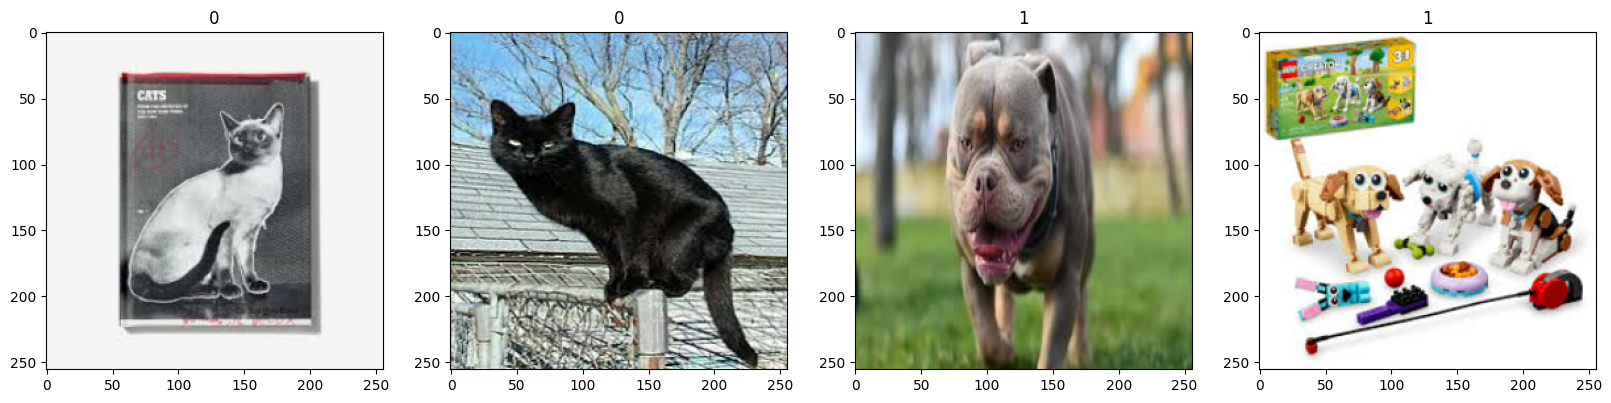

In [18]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [19]:
batch[0].max()

1.0

## SPLIT OUR DATA

In [20]:
len(data)

26

In [21]:
train_size =  int(len(data)* .7)
test_size = int(len(data)* .2)
val_size = int(len(data)* .1)+1

In [22]:
train_size+test_size+val_size

26

In [23]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [24]:
len(test)

5

## deep model

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [26]:
model = Sequential()

In [27]:
#
model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [28]:
model.compile('adam', loss=tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

In [30]:
logdir = 'logs'

In [31]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [32]:
from keras.callbacks import EarlyStopping

# Define the EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
hist = model.fit(train, epochs=40, validation_data=val, callbacks=[tensorboard_callback, early_stopping])


Epoch 1/40




18/18 [==============================] - 9s 418ms/step - loss: 0.7891 - accuracy: 0.5347 - val_loss: 0.6870 - val_accuracy: 0.5417
Epoch 2/40
18/18 [==============================] - 8s 404ms/step - loss: 0.6717 - accuracy: 0.6059 - val_loss: 0.6986 - val_accuracy: 0.5729
Epoch 3/40
18/18 [==============================] - 7s 390ms/step - loss: 0.6782 - accuracy: 0.5851 - val_loss: 0.6703 - val_accuracy: 0.6562
Epoch 4/40
18/18 [==============================] - 7s 381ms/step - loss: 0.6558 - accuracy: 0.6059 - val_loss: 0.6367 - val_accuracy: 0.6146
Epoch 5/40
18/18 [==============================] - 7s 371ms/step - loss: 0.6327 - accuracy: 0.6997 - val_loss: 0.5808 - val_accuracy: 0.6875
Epoch 6/40
18/18 [==============================] - 7s 369ms/step - loss: 0.5716 - accuracy: 0.7031 - val_loss: 0.5762 - val_accuracy: 0.7396
Epoch 7/40
18/18 [==============================] - 7s 395ms/step - loss: 0.5143 - accuracy: 0.7552 - val_loss: 0.4659 - val_accuracy: 0.7604
Epoch 8/40
18/1

In [33]:
hist.history

{'loss': [0.7891205549240112,
  0.6716762781143188,
  0.6781894564628601,
  0.6558493971824646,
  0.6327112317085266,
  0.5716446042060852,
  0.5143079161643982,
  0.42819198966026306,
  0.37218916416168213,
  0.2920735478401184,
  0.23359929025173187,
  0.12192947417497635,
  0.07074402272701263,
  0.052365414798259735,
  0.038377974182367325,
  0.019250638782978058,
  0.018923692405223846,
  0.034467894583940506,
  0.019068175926804543,
  0.008860450237989426,
  0.010479246266186237,
  0.06754262745380402,
  0.045002445578575134,
  0.04785002022981644,
  0.055503033101558685,
  0.02258164808154106,
  0.003630064893513918,
  0.003140667686238885,
  0.0012710066512227058,
  0.004100529942661524,
  0.004572538658976555,
  0.0024230435956269503,
  0.0010711867362260818,
  0.00029889156576246023,
  0.000381324760382995,
  0.00585505785420537,
  0.0032850285060703754,
  0.0008439150406047702],
 'accuracy': [0.5347222089767456,
  0.6059027910232544,
  0.5850694179534912,
  0.605902791023254

## 3.3 Plot Performance

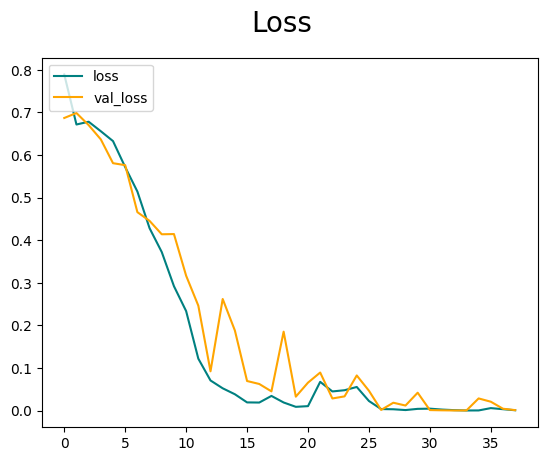

In [35]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

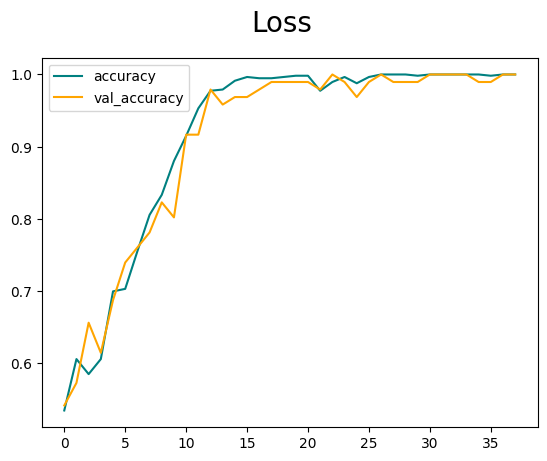

In [36]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

## 4. Evalute the performance

In [37]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [39]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [40]:
len(test)

5

In [41]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 63ms/step


In [42]:
print(f'Precision: {pre.result().numpy()}, Recall: {re.result().numpy()}, Accuracy: {acc.result().numpy()}')

Precision: 1.0, Recall: 0.9803921580314636, Accuracy: 0.9923664331436157


## 4.2 Test

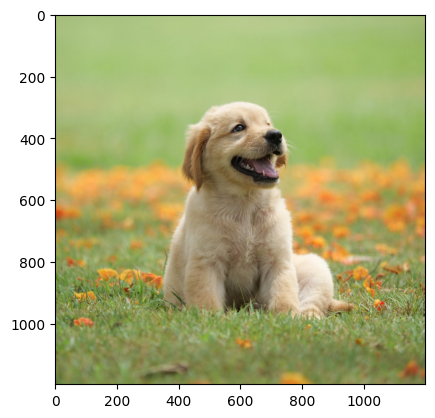

In [66]:
img = cv2.imread('dog_test.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

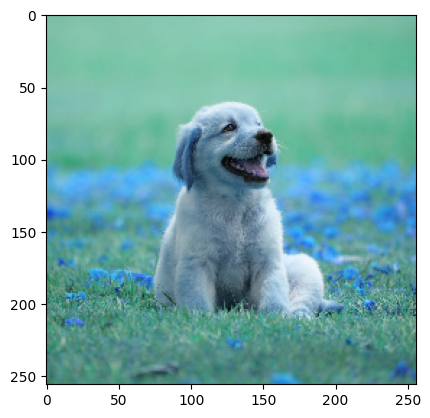

In [67]:
resize = tf.image.resize(img, (256, 256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [68]:
resize.shape

TensorShape([256, 256, 3])

In [69]:
np.expand_dims(resize, 0).shape

(1, 256, 256, 3)

In [70]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 45ms/step


In [71]:
yhat

array([[0.92086434]], dtype=float32)

In [72]:
if yhat > 0.5:
    print('dog')
else:
    print('cat')

dog


## 5.Save model

In [73]:
from tensorflow.keras.models import load_model

In [74]:
model.save(os.path.join('models', 'catdogmodel.h5'))

c:\Noor_work\Baharat_Intern\Tasks\Cat_dog_image_classifier\Cat_dog_image_classifier\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
